# 

<a id="s"></a>

# <p style="background-color: blue; font-family: 'new times roman'; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 15px 50px;"> ☀ Part 1: Preprocessing ☀ </p>

<a href="#"> **Objective:** </a> The objective of this part is to clean and explore the data to prepare it in a suitable format for modeling in part 2.

In this problem, we have two databases named **`economy.csv`** and **`business.csv`**, both of which have the same columns:

- `date`: date of ticket purchase
- `airline`: name of the airline
- `ch_code`: flight code
- `num_code`: flight number
- `dep_time`: departure time
- `from`: city of origin
- `time_taken`: travel time
- `stop`: number of stops
- `arr_time`: arrival time
- `to`: destination city
- `price`: travel price (INR, Indian currency)

# Summary:

- <a href="#C0"> Importing Global Libraries </a>

- <a href="#C1"> Importing Data </a>
    - Data Structure

**Part I: Data Preprocessing**
- <a href="#C11"> I-1/ Description of Databases </a>
- <a href="#C12"> I-2/ Variable Processing </a>
    + <a href="#C12a"> I-2-a/ Variables `ch_code` and `num_code` </a>
    + <a href="#C12b"> I-2-b/ Variables `dep_time` and `arr_time` </a>
    + <a href="#C12c"> I-2-c/ Variables `time_taken` </a>
    + <a href="#C12e"> I-2-e/ Variables `stop` </a>
    + <a href="#C12f"> I-2-f/ Variables `price` </a>
    + <a href="#C12g"> I-2-g/ Variables `date` </a>
    + <a href="#C12h"> I-2-h/ Other variables `airline`, `from`, `to`, `price` </a>
- <a href="#C13"> I-3/ Exploratory Analysis </a>
    + <a href="#C13a"> I-3-a/ Study of Relationships Between Variables </a>
    + <a href="#C13b"> I-3-b/ Selection of Final Features (Variables) for Modeling </a>


## <a name="#C0"> Libraries import</a>

In [1]:
# numpy et matplotlib
%pylab inline

# pandas des strures de données faciles à analyser
import pandas as pd
import seaborn as sns
import scipy.stats as stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 

## <a name="C1"> Data Import</a>
Our data consists of two files that separate flights into two classes:

- Economy class
- Business class

In [2]:
df_eco = pd.read_csv("../DATA/economy.csv")
df_bus = pd.read_csv("../DATA/business.csv")

# 
- A quick overview of the structure of our two databases

In [3]:
# economy Class Flights data
display(df_eco.head())

# number of samples and features in the economy class
print()
print(92 * "=")
print(f"The number of variables is: {df_eco.shape[1]}\n")
print(f"The number of samples is: {df_eco.shape[0]}")
print(92 * "=", "\n\n")

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"



The number of variables is: 11

The number of samples is: 206774




In [4]:
# business Class Flights data
display(df_bus.head())

# number of samples and features in the economy class
print()
print(92 * "=")
print(f"The number of variables is: {df_bus.shape[1]}\n")
print(f"The number of samples is: {df_bus.shape[0]}")
print(92 * "=", "\n\n")

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"



The number of variables is: 11

The number of samples is: 93487




# I - Data préprocessing
##  <a name="C11"> I-1 Database Description </a>

In this section, our task will be to gather as much information as possible about our variables, including their type, number, categories, and the number of missing values.

- Both databases have the same structure, so we will concatenate them vertically.

In [5]:
# I am creating a new variable class in both dataframes to indicate the type of flight taken
df_eco["class"] = "economy"
df_bus["class"] = "business"

In [6]:
# I am concatenating the two dataframes
df = pd.concat([df_eco, df_bus], axis=0)

# Reset the indices to zero
df = df.reset_index(drop=True)
d = df.copy()

# Display the final dataframe
display(df.tail())

# Number of samples and features in the final dataframe
print()
print(92 * "=")
print(f"The number of variables is: {df.shape[1]}\n")
print(f"The number of samples is: {df.shape[0]}")
print(92 * "=", "\n\n")

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business
300260,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"81,585",business



The number of variables is: 12

The number of samples is: 300261




 - Number of missing values:

In [7]:
df.isnull().sum().sum()

0

There are no missing values in our dataset

- Duplicate entries

In [8]:
# search for duplicates
df.loc[df[df.columns].duplicated(keep=False),:]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
516,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
563,14-02-2022,Air India,AI,807,17:20,Delhi,15h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Mumbai,"12,150",economy
6080,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy
6181,13-03-2022,Air India,AI,475,13:00,Delhi,24h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,13:35,Mumbai,"4,780",economy


In [9]:
# drop duplicate entries
df.drop_duplicates(subset=df.columns, inplace=True, ignore_index=True)

# verify
df.loc[df[df.columns].duplicated(keep=False),:]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class


# 
 - Variable info

In [10]:
df.describe(include=["int", "float", "object"]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,300259,49,07-03-2022,6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline,300259,8,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ch_code,300259,8,UK,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_code,300259.0,NaN,NaN,NaN,1417.776883,1974.519951,101.0,637.0,818.0,927.0,9991.0
dep_time,300259,251,07:00,8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from,300259,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_taken,300259,483,02h 10m,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stop,300259,40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,243601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arr_time,300259,266,19:55,9194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
to,300259,6,Mumbai,59107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All our variables except for `num_code` are of the same type. In the following, I will begin preprocessing and address some variables one by one.

## <a name="C12">I-2/ Variable Processing</a>

### <a name="C12a">I-2-a/ Variables `ch_code` and `num_code</a>

Both columns, `ch_code` and `num_code`, essentially contain the same information, which is the aircraft's identification. Therefore, we can combine them into a single column named `flight`.

In [11]:
# I first check the different modalities of each one
print(92 * "=")
print(f"Modalities of the variable {'ch_code'.upper()} ======> {df['ch_code'].unique()}")
print(92 * "=")
print(f"Some modalities of the variable {'num_code'.upper()} ======> {df['num_code'].unique()[::100]}")
print(92 * "=")

Modalities of the variable CH_CODE ======> ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']
Some modalities of the variable NUM_CODE ======> [8709  469  775 5012  947  928  223 6003  991 2009 7175 6433 2462]


Then concatenating them.

In [12]:
# Concatenation of `ch_code` and `num_code` into a new column 'flight'
df["flight"] = df["ch_code"] + "-" + df["num_code"].astype(str)

# Display modalities of the new variable
print(100 * "=")
print(f"Some modalities of the new variable {'flight'.upper()} ======> {df['flight'].unique()[::100]}")
print(100 * "=","\n\n\n")

Some modalities of the new variable FLIGHT ======> ['SG-8709' 'G8-188' 'G8-2509' 'SG-8171' '6E-2043' 'UK-988' 'UK-857'
 '6E-136' 'AI-505' 'UK-897' '6E-357' 'G8-512' '6E-5327' 'AI-559' '6E-6358'
 '6E-2007']





### <a name="C12b">I-2-b/ Variables `dep_time` and `arr_time`</a>

These two variables represent the departure time and arrival time of each flight. They are expressed as a time of day, ranging from 0 to 24 hours, in the `HH:MM` format.

The processing we can apply is as follows:

- Convert these times into numerical values of type `float`.
- Categorize these times into time of day ranges, as airlines tend to consider flights based on the time of day. For example:
  + `Morning`: for hours between 5:00 and 11:59
  + `Afternoon`: for hours between 12:00 and 16:59
  + `Evening`: for hours between 17:00 and 21:59
  + `Night`: for hours between 22:00 and 4:59 ===> (22:00 to 23:59) and (00:00 to 4:59)

This categorization makes the information more understandable and relevant for flight analysis.

In [13]:
# Replace ':' with '.' and convert to float
df['dep_time'] = df['dep_time'].map(lambda x: float(x.replace(':', '.')))
df['arr_time'] = df['arr_time'].map(lambda x: float(x.replace(':', '.')))

In [14]:
# Time categorization masks based on flight hours
def categrization_time(df, cols):
    for col in cols:
        mask_morning = (df[col] >= 5) & (df[col] < 12)
        mask_afternoon = (df[col] >= 12) & (df[col] < 17)
        mask_evening = (df[col] >= 17) & (df[col] < 22)
        mask_night = (df[col] >= 22) & (df[col] < 24) | (df[col] >= 0) & (df[col] < 5)

        # Dictionary of categorizations
        dict_ = { "morning": mask_morning, 
                 "afternoon": mask_afternoon,
                 "evening": mask_evening,
                 "night": mask_night
        }

        # Loop to assign categories to each flight
        for val, mask in dict_.items():
            df.loc[mask, col] = val
            
    return  df
    
df = categrization_time(df, ["dep_time", "arr_time"])


C:\Users\sekou\AppData\Local\Temp\ipykernel_20868\1101655803.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = val


In [15]:
# I check the new modalities of `dep_time` and `arr_time`
print(84 * "=")
print(f"Modalities of the variable {'dep_time'.upper()} ======> {df['dep_time'].unique()}")
print(84 * "=")
print(f"Modalities of the variable {'arr_time'.upper()} ======> {df['arr_time'].unique()}")
print(84 * "=", "\n\n\n")

Modalities of the variable DEP_TIME ======> ['evening' 'morning' 'night' 'afternoon']
Modalities of the variable ARR_TIME ======> ['evening' 'morning' 'afternoon' 'night']





### <a name="C12c">I-2-c/ Variable `time_taken`</a>

This variable describes the duration of the flight in hours and minutes and is expressed in two possible formats:

- `@@h @@m`: when the entry in the database is correct.
- `@@.@@h m`: when the entry in the database is incorrectly formatted.

The processing will involve converting this column into a numerical value of type `float` to facilitate its use in analysis.


In [16]:
# Display some modalities of 'time_taken' before processing
print(100 * "=")
print(f"Some modalities BEFORE {'time_taken'.upper()} processing ======> {df['time_taken'].unique()[::50]}")
print(100 * "=")

# You can uncomment the line below to check all modalities
#df.time_taken.unique()

Some modalities BEFORE TIME_TAKEN processing ======> ['02h 10m' '13h 50m' '23h 30m' '10h 30m' '02h 25m' '17h 20m' '20h 00m'
 '30h 20m' '33h 40m' '1.01h m']


In [17]:
# Processing of the `time_taken` variable

# Processing for well-formatted entries
df['time_taken'] = df['time_taken'].map(lambda x: x.replace('h ', '.').replace('m', ''))
print(f"Some modalities AFTER {'time_taken'.upper()} processing ======> {df['time_taken'].unique()[::50]}")

# Processing for incorrectly formatted entries (the previous processing will add a `.` at the end of incorrectly formatted entries)
# I use the `rstrip` method to remove this added period
df['time_taken'] = df['time_taken'].map(lambda x: x.rstrip('.') if x[-1] == '.' else x)
print(f"Some modalities AFTER {'time_taken'.upper()} processing ======> {df['time_taken'].unique()[::50]}")

# Conversion of the column to float
df['time_taken'] = df['time_taken'].astype(float)
print(f"Some modalities AFTER {'time_taken'.upper()} processing ======> {df['time_taken'].unique()[::50]}")


Some modalities AFTER TIME_TAKEN processing ======> ['02.10' '13.50' '23.30' '10.30' '02.25' '17.20' '20.00' '30.20' '33.40'
 '1.01.']
Some modalities AFTER TIME_TAKEN processing ======> ['02.10' '13.50' '23.30' '10.30' '02.25' '17.20' '20.00' '30.20' '33.40'
 '1.01']
Some modalities AFTER TIME_TAKEN processing ======> [ 2.1  13.5  23.3  10.3   2.25 17.2  20.   30.2   3.2  39.05]


**Note:** By observing the last two modalities after converting the time_taken column to float, one might think that the processing was not done correctly. However, this is not the case. The reason for this difference is that the unique values differ when converted to float compared to their string representation. This is because, for example, for the strings "30.10" and "30.1", they are not equivalent, but when converted to float, they become the same value. That's why the lists of unique values differ.

For example, in string form, "30.10" != "30.1", but when they are converted to float, they become equivalent. This explains the difference between the lists of unique values.

### <a name="C12e">I-2-e/ Variable `stop`</a>

This variable describes the number of stops made by the flight. It contains three modalities that we can summarize as follows:

- `Non-stop`: when the flight did not make any stops.
- `1-stopXXXXXXXXX`: when the flight made `one` stop, where `XXXXXXXX` represents information of little interest for analysis.
- `2+-stop`: when the flight made `2 or more` stops.

The processing to apply to this variable is to replace the above modalities with:

- `0-stop`: when the flight did not make any stops.
- `1-stop`: when the flight made `one` stop.
- `2-stops`: when the flight made `2 or more` stops.


In [18]:
# Display some modalities of the `stop` variable before processing
print(80 * "=")
print(f"Some modalities BEFORE {'stop'.upper()} processing ======> {df['stop'].unique()[:15:3]}")
print(80 * "=")

Some modalities BEFORE STOP processing ======> ['non-stop '
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t']


In [19]:
# Processing on the variable
df['stop'] = df['stop'].map(lambda x: "0-stop" if "non" in x else "1-stop" if "1" in x else "2-stops")

In [20]:
# Display the modalities of 'stop' after processing
print(50 * "=")
print(f"Some modalities AFTER {'stop'.upper()} processing ======> {df['stop'].unique()}")
print(50 * "=", '\n\n\n')

Some modalities AFTER STOP processing ======> ['0-stop' '1-stop' '2-stops']





### <a name="C12f">I-2-f/ Variable `price`</a>

This variable is the target variable, the one we want to explain. Logically, it is a continuous variable. However, it is described here as an `object` type due to the Anglo-Saxon notation system, where the `,` character in numbers is used to separate thousands, which improves readability.

Therefore, we need to convert this column to a numerical variable by removing the `,` character.

In [21]:
# Display some modalities of the 'price' variable before processing
print(100 * "=")
print(f"Some modalities BEFORE {'price'.upper()} processing ======> {df['price'].unique()}")
print(100 * "=")

Some modalities BEFORE PRICE processing ======> ['5,953' '5,956' '5,955' ... '87,051' '74,731' '77,105']


In [22]:
# Processing of the 'price' column
df['price'] = df['price'].map(lambda x: float(x.replace(',', '')))

In [23]:
# Display the modalities of 'price' after processing
print(100 * "=")
print(f"Some modalities AFTER {'price'.upper()} processing ======> {df['price'].unique()}")
print(100 * "=", '')

Some modalities AFTER PRICE processing ======> [ 5953.  5956.  5955. ... 87051. 74731. 77105.]


For the few displayed values, we can see that there is a significant dispersion in the values of this variable. We will verify the nature of these extreme values in the "Exploratory Analysis" section.
# 

### <a name="C12g">I-2-g/ Variable `date`</a>

This variable describes the date on which the ticket was booked. To facilitate the analysis, we will transform it into two new variables:

- `Day`: for the day part of the date.
- `Month`: for the month part of the date.

We ignore the `year` part of the date since the database is filled over the course of one year.

In [24]:
# Import the time class
from datetime import datetime as dt

# I convert the Date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# I convert the Date column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Day variable
df['day'] = df['date'].dt.day

# Month variable
df['month'] = df['date'].dt.month

df.head(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,day,month
0,2022-02-11,SpiceJet,SG,8709,evening,Delhi,2.1,0-stop,evening,Mumbai,5953.0,economy,SG-8709,11,2
1,2022-02-11,SpiceJet,SG,8157,morning,Delhi,2.2,0-stop,morning,Mumbai,5953.0,economy,SG-8157,11,2
2,2022-02-11,AirAsia,I5,764,night,Delhi,2.1,0-stop,morning,Mumbai,5956.0,economy,I5-764,11,2


### <a name="C12h">I-2-h/ Other variables `airline`, `from`, `to`, `price`</a>

As for these variables, there is no preprocessing to be done. They have been correctly filled and are already in a form that allows for exploratory analysis.

# 
#### New database

In [25]:
# Display the final dataframe
display(df.head())

# Number of individuals and features of the final dataframe
print(92 * "=")
print(f"The number of variables is: {df.shape[1]}\n")
print(f"The number of individuals is: {df.shape[0]}")
print(92 * "=")


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight,day,month
0,2022-02-11,SpiceJet,SG,8709,evening,Delhi,2.10,0-stop,evening,Mumbai,5953.0,economy,SG-8709,11,2
1,2022-02-11,SpiceJet,SG,8157,morning,Delhi,2.20,0-stop,morning,Mumbai,5953.0,economy,SG-8157,11,2
2,2022-02-11,AirAsia,I5,764,night,Delhi,2.10,0-stop,morning,Mumbai,5956.0,economy,I5-764,11,2
3,2022-02-11,Vistara,UK,995,morning,Delhi,2.15,0-stop,afternoon,Mumbai,5955.0,economy,UK-995,11,2
4,2022-02-11,Vistara,UK,963,morning,Delhi,2.20,0-stop,morning,Mumbai,5955.0,economy,UK-963,11,2


The number of variables is: 15

The number of individuals is: 300259


Our dimensionality has increased with the new columns we created. In the next step, we will perform exploratory data analysis. This will include:

- Studying correlations
- Detecting outliers
- Encoding categorical variables
- Finally, selecting relevant columns

for the second part, which is modeling.

##  <a name="C13">I-3/ Exploratory Analysis</a>

- First selection of relevant columns

In [26]:
# Relevant columns
cols = ["day", "month", "flight", "airline", "class", "from", "dep_time",
        "to", "arr_time", "stop", "time_taken", "price"]

# New dataframe
df = df[cols]

# Display the final dataframe
display(df.head(3))

# Number of individuals and features of the final dataframe
print()
print(92 * "=")
print(f"The number of variables is: {df.shape[1]}\n")
print(f"The number of individuals is: {df.shape[0]}")
print(92 * "=", "\n\n")


,day,month,flight,airline,class,from,dep_time,to,arr_time,stop,time_taken,price
0,11,2,SG-8709,SpiceJet,economy,Delhi,evening,Mumbai,evening,0-stop,2.1,5953.0
1,11,2,SG-8157,SpiceJet,economy,Delhi,morning,Mumbai,morning,0-stop,2.2,5953.0
2,11,2,I5-764,AirAsia,economy,Delhi,night,Mumbai,morning,0-stop,2.1,5956.0



The number of variables is: 12

The number of individuals is: 300259




#  
 - Encoding of Categorical Variables

In [27]:
# Categorical columns
categorical_columns = ["flight", "airline", "class", "from", "dep_time", "to", "arr_time", "stop"]

# Display of categorical variables before encoding
print(40 * "=", "  Output  ", 40 * "=")
print("CATEGORICAL VARIABLES BEFORE ENCODING\n")

# Loop to check the modalities of categorical variables
for col in categorical_columns:
    # Display modalities
    print(f"Modalities of the variable {col.upper()} ======> {df[col].unique()}")

print(92 * "=")

# Encoding of categorical variables
# Import the encoding class
from sklearn.preprocessing import LabelEncoder

# Create an encoder object
encoder = LabelEncoder()

# Loop for encoding variables
for col in categorical_columns:
    # Encoding
    df[col] = encoder.fit_transform(df[col])

print("\n\n")
# Display after encoding
print(40 * "=", "  Output  ", 40 * "=")
print("CATEGORICAL VARIABLES AFTER ENCODING\n")

# Loop to check the modalities of categorical variables
for col in categorical_columns:
    # Display modalities
    print(f"Modalities of the variable {col.upper()} ======> {df[col].unique()}")

print(92 * "=")


========================================   Output   ========================================
CATEGORICAL VARIABLES BEFORE ENCODING

Modalities of the variable FLIGHT ======> ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Modalities of the variable AIRLINE ======> ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']
Modalities of the variable CLASS ======> ['economy' 'business']
Modalities of the variable FROM ======> ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Modalities of the variable DEP_TIME ======> ['evening' 'morning' 'night' 'afternoon']
Modalities of the variable TO ======> ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Modalities of the variable ARR_TIME ======> ['evening' 'morning' 'afternoon' 'night']
Modalities of the variable STOP ======> ['0-stop' '1-stop' '2-stops']



========================================   Output   ========================================
CATEGORICAL VARIABLES AFTER 

In [28]:
# encoded database
df

,day,month,flight,airline,class,from,dep_time,to,arr_time,stop,time_taken,price
0,11,2,1416,4,1,2,1,5,1,0,2.10,5953.0
1,11,2,1395,4,1,2,2,5,2,0,2.20,5953.0
2,11,2,1217,1,1,2,3,5,2,0,2.10,5956.0
3,11,2,1567,7,1,2,2,5,0,0,2.15,5955.0
4,11,2,1557,7,1,2,2,5,2,0,2.20,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31,3,1485,7,0,1,2,3,1,1,10.05,69265.0
300255,31,3,1489,7,0,1,0,3,3,1,10.25,77105.0
300256,31,3,1494,7,0,1,2,3,1,1,13.50,79099.0
300257,31,3,1491,7,0,1,2,3,1,1,10.00,81585.0


#
- Outliers

In our database, we can check for outliers in the `time_taken` and `price` variables. The other variables are not only categorical but have been constructed.

> Variable `time_taken`

For this variable, we will plot its `boxplot` and interpret what it informs us to then intercept with other information to determine if they are `outliers` or `atypical` values.


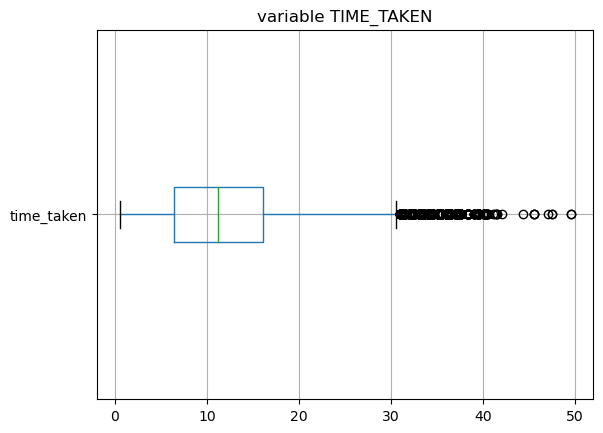

In [29]:
# `time_taken` boxplot
df.boxplot(column="time_taken", vert=False)
plt.title(f"Variable {'time_taken'.upper()}")
plt.show()display(df.loc[df.time_taken > 30, ["stop"]].head())


In [30]:
display(df.loc[df.time_taken > 30, ["stop"]].head())

# Number of stops
print("Number of stops")
df.loc[df.time_taken > 30, ["stop"]].value_counts()

,stop
114,1
357,1
546,1
724,1
907,1


Number of stops


stop
1       1390
2        836
Name: count, dtype: int64

We note that trips whose `time_taken` variable values are considered as `outliers` are those that have at least one stop. By checking on the **"Easy my trip website"**, we find that there are indeed some of these trips that take more than one day of flight. Therefore, these values are `atypical` and not `outliers`, there is no need to remove them from our analysis. These are possible events in our phenomenon.


> Variable `price`

By converting the `price` variable, we noticed that there was a large disparity between its modalities. Let's check what type of outliers they are.

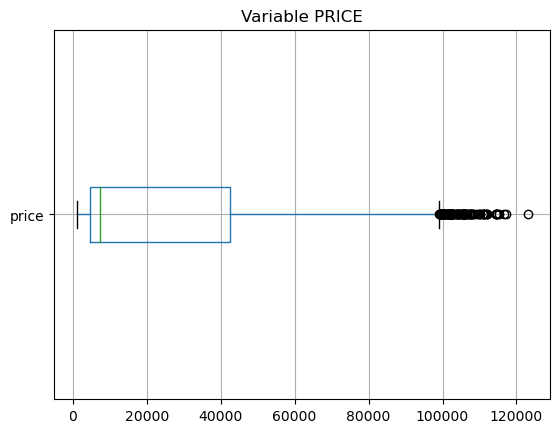

In [31]:
# `price` boxplot
df.boxplot(column="price", vert=False)
plt.title(f"Variable {'price'.upper()}")
plt.show()

In [32]:
display(df.loc[df.price > 100000, ["class"]].head())

# Class of the flight
print("Class of the flight")
df.loc[df.price > 100000, ["class"]].value_counts()

,class
215964,0
215965,0
216131,0
216201,0
216202,0


Class of the flight


class
0        108
Name: count, dtype: int64

By checking the output of the encoding done above on the `class` variable, we can see that `0 corresponds to the business class`. Furthermore, by checking the ticket price of the business class, we quickly realize that these are also possible prices, so they are `atypical outliers and not aberrant`. So they should be kept.

#
## <a name="C13a">I-3-a/ Study of the relationships between variables</a>

The database consists mainly of categorical variables, so we will use the `Cramer's V coefficient` to study the relationships.

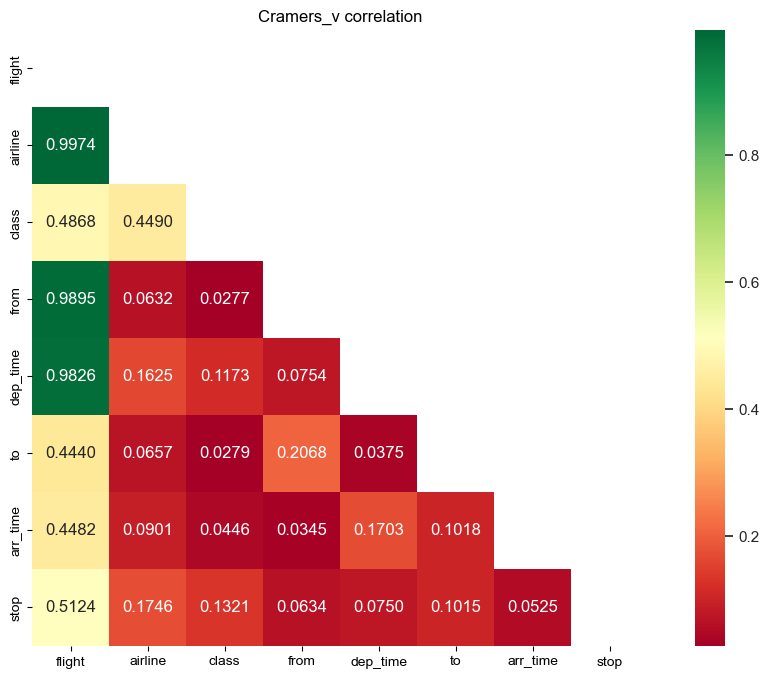

In [34]:
# function calculating Cramer's contingency coefficient
def df_cramers_v(df):
    vars_ = df.columns.to_list()
    tab = np.zeros((len(vars_), len(vars_)))
    df_cramers = pd.DataFrame(index=vars_, columns=vars_, data=tab)
    for col in range(df_cramers.shape[0]):
        for row in range(df_cramers.shape[0]):
            if row >= col :
                index_name = df_cramers.index[row]
                column_name = df_cramers.columns[col]
                contingency = pd.crosstab(df[index_name], df[column_name])
                chi2 = stats.chi2_contingency(contingency)[0]
                n = contingency.sum().sum()
                phi2 = chi2 / n
                r, k = contingency.shape
                phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
                rcorr = r - ((r-1)**2)/(n-1)
                kcorr = k - ((k-1)**2)/(n-1)
                df_cramers.iloc[row, col] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    plt.figure(figsize = (12,8), facecolor='w')
    plt.title("Cramers_v correlation")
    upper_triangle_indices = np.triu_indices_from(df_cramers)
    df_cramers.values[upper_triangle_indices] = np.nan
    sns.set()
    sns.heatmap(df_cramers, cmap='RdYlGn', annot=True, fmt=".4f", square=True)
    plt.show()
    
            
df_cramers_v(df[categorical_columns])

We can see that the `flight` variable is strongly correlated with the `dep_time, from, airline` variables. For modeling, we will keep only the `from` variable. Because among the 4 variables, intuitively we know that the departure city is more significant in influencing the airfare than the other variables.

#
## <a name="C13b">I-3-b/ Selection of final features (variables) for modeling</a>

In [35]:
# Columns for modeling
final_cols = ["day", "month", "class", "from", "to", "arr_time", "stop", "time_taken", "price"]

# Dataframe for modeling
data_for_modeling = df[final_cols]

# Display of the final dataframe
display(data_for_modeling.head(3))

# Number of individuals and features in the final dataframe
print()
print(50 * "=")
print(f"The number of variables is: {data_for_modeling.shape[1]}\n")
print(f"The number of individuals is: {data_for_modeling.shape[0]}")
print(50 * "=", "\n\n")


,day,month,class,from,to,arr_time,stop,time_taken,price
0,11,2,1,2,5,1,0,2.1,5953.0
1,11,2,1,2,5,2,0,2.2,5953.0
2,11,2,1,2,5,2,0,2.1,5956.0



The number of variables is: 9

The number of individuals is: 300259




In [36]:
# Exportez le DataFrame vers un fichier CSV
df.to_csv('../DATA/data_for_modeling.csv', index=False) 